In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  age_range_ord  education_level_ord  workclass_Federal-gov  \
0               0              2                    6                      0   
1               0              2                    6                      0   
2               0              2                    3                      0   
3               0              2                    2                      0   
4               0              2                    6                      0   

   ...  origin_descent_Asia  origin_descent_Carib  \
0  ...                    0                     0   
1  ...                    0                     0   
2  ...                    0                     0   
3  ...                    0                     0   
4  ...                    0                     1   

   origin_descent_Central America  origin_descent_Europe  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   origin_descent_North America  origin_descent_South America  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   origin_descent_United States  age_range_adult  age_range_child  \
0                             1                1                0   
1                             1                1                0   
2                             1                1                0   
3                             1                1                0   
4                             0                1                0   

   age_range_senior  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 66 columns]

In [5]:
ml_data.dtypes

age                             int64
fnlwght                         int64
education_num_yr                int64
cap_gain                        int64
cap_loss                        int64
                                ...  
origin_descent_South America    int64
origin_descent_United States    int64
age_range_adult                 int64
age_range_child                 int64
age_range_senior                int64
Length: 66, dtype: object

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             30072 non-null  int64
 1   fnlwght                         30072 non-null  int64
 2   education_num_yr                30072 non-null  int64
 3   cap_gain                        30072 non-null  int64
 4   cap_loss                        30072 non-null  int64
 5   hours_per_week                  30072 non-null  int64
 6   income_outcome                  30072 non-null  int64
 7   age_range_ord                   30072 non-null  int64
 8   education_level_ord             30072 non-null  int64
 9   workclass_Federal-gov           30072 non-null  int64
 10  workclass_Local-gov             30072 non-null  int64
 11  workclass_Private               30072 non-null  int64
 12  workclass_Self-emp-inc          30072 non-null  int64
 13  w

In [7]:
ml_df = ml_data.copy()

In [8]:
ml_df.shape

(30072, 66)

In [9]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 

if 'marital_stat_Unmarried' in ml_df:
    del ml_df['marital_stat_Unmarried'] 
    X = ml_df.values 






In [10]:
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [11]:
ml_df.shape

(30072, 61)

====Iteration 0  ====

Accuracy:  0.8515378221113882 

f1_score: 0.6691367173027046 

precision_score: 0.7212460063897763 

roc_auc_score: 0.7738243536660788 

Confusion Matrix: 

      0    1
0  4219  349
1   544  903 

Train Time:  0.760559508 s

====Iteration 1  ====

Accuracy:  0.8497090606816292 

f1_score: 0.6748201438848921 

precision_score: 0.7450357426528992 

roc_auc_score: 0.7726354841739457 

Confusion Matrix: 

      0    1
0  4173  321
1   583  938 

Train Time:  1.137746147 s

====Iteration 2  ====

Accuracy:  0.8518703241895261 

f1_score: 0.6725468577728776 

precision_score: 0.7227488151658767 

roc_auc_score: 0.7759461475854584 

Confusion Matrix: 

      0    1
0  4209  351
1   540  915 

Train Time:  1.1514800540000003 s



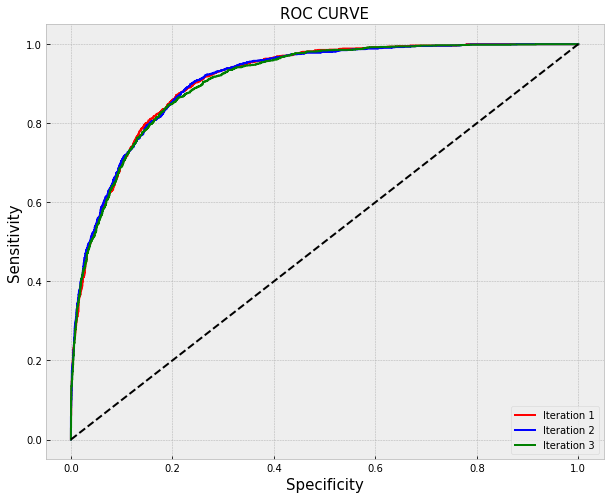

In [12]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
##https://docs.python.org/3/library/time.html#functions

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


#lr_clf = LogisticRegression(penalty='elasticnet', C=1.0, class_weight=None, solver='saga', l1_ratio = 0.5 )
lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    t = time.process_time()
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions
    
    elapsed_time = time.process_time() - t
    

    # now let's get the accuracy and confusion matrix for these iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [13]:
weights

array([[ 4.96612970e-01,  8.33039910e-02,  8.72343946e-01,
         2.31910893e+00,  2.62523964e-01,  2.57013115e-01,
        -1.87592623e-02, -6.89772231e-02,  7.73676431e-02,
        -3.66143833e-02,  3.92862921e-02,  6.21178144e-02,
        -7.61854510e-02, -4.76770560e-02, -1.28159787e-01,
        -1.68473589e-02, -1.24969224e-02, -1.72556408e-02,
         2.54929486e-01, -1.63780589e-01, -1.50885165e-01,
        -9.44733024e-02, -2.68796590e-01, -2.21161847e-01,
         1.74461846e-01,  7.55302416e-02,  8.42780142e-02,
         1.01326633e-01, -3.50943613e-02,  5.10967288e-01,
        -2.21521475e-01, -1.04095805e-01, -5.51191409e-01,
        -1.51230202e-01,  4.92164363e-01,  3.55467474e-01,
         1.22480657e-02,  1.78419531e-01, -5.37941712e-02,
        -4.51216935e-02,  2.45641012e-02,  5.86735556e-04,
         4.29503989e-03,  8.29230417e-02,  2.26793808e-02,
         1.76264674e-01, -5.28749200e-02,  5.92820745e-02,
        -3.09655230e-02, -5.15476046e-02,  2.62431244e-0

In [14]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [15]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    iter_num =+1
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8315876974231089 

f1_score: 0.6013380558835104 

precision_score: 0.702851885924563 

roc_auc_score: 0.7273146197638191 

Confusion Matrix: 

      0    1
0  4238  323
1   690  764 

Train Time:  0.09702547500000058 s

====Iteration 1  ====

Accuracy:  0.8314214463840399 

f1_score: 0.611791730474732 

precision_score: 0.7153088630259624 

roc_auc_score: 0.732047089117116 

Confusion Matrix: 

      0    1
0  4202  318
1   696  799 

Train Time:  0.35671269200000033 s

====Iteration 2  ====

Accuracy:  0.8335827098919368 

f1_score: 0.6299445471349353 

precision_score: 0.7159663865546219 

roc_auc_score: 0.7436325632563257 

Confusion Matrix: 

      0    1
0  4162  338
1   663  852 

Train Time:  0.3721296330000001 s



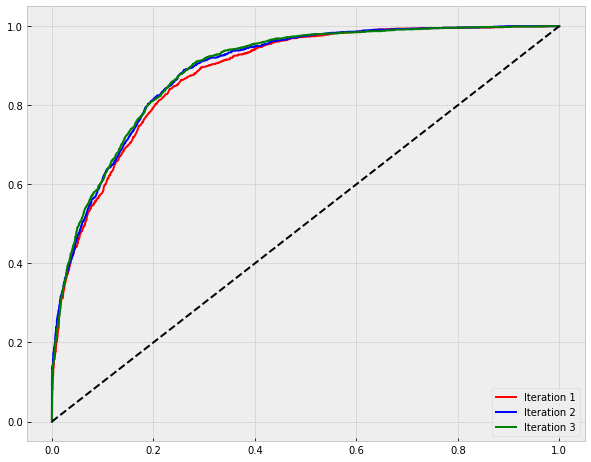

In [16]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    
    t = time.process_time()
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])
    
    elapsed_time = time.process_time() - t
    


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    f1_scor_ = mt.f1_score(y[test_indices],y_hat)
    prec_scor_ = mt.precision_score(y[test_indices], y_hat)
    auc_scor_ = mt.roc_auc_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [17]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


from sklearn.svm import SVC


svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num += 1
    
    

====Iteration 0  ====

Accuracy:  0.857522859517872 

f1_score: 0.6834133727373476 

precision_score: 0.7625721352019785 

roc_auc_score: 0.7777202594940702 

Confusion Matrix: 

      0    1
0  4233  288
1   569  925 

Train Time:  35.127533602 s

====Iteration 1  ====

Accuracy:  0.8513715710723192 

f1_score: 0.6587786259541984 

precision_score: 0.7433247200689062 

roc_auc_score: 0.7630463876240297 

Confusion Matrix: 

      0    1
0  4258  298
1   596  863 

Train Time:  34.798609371999994 s

====Iteration 2  ====

Accuracy:  0.8517040731504572 

f1_score: 0.6681547619047619 

precision_score: 0.7354627354627354 

roc_auc_score: 0.7705566886633465 

Confusion Matrix: 

      0    1
0  4225  323
1   569  898 

Train Time:  37.15335645100001 s



In [18]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for (train_indices, test_indices) in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

In [19]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions




# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
t = time.process_time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

elapsed_time = time.process_time() - t


acc = mt.accuracy_score(y_test,y_hat)
f1_scor_ = mt.f1_score(y_test,y_hat)
prec_scor_ = mt.precision_score(y_test, y_hat)
auc_scor_ = mt.roc_auc_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print("Accuracy: ", acc, "\n" )
print("f1_score:", f1_scor_, "\n")
print("precision_score:",prec_scor_ , "\n")
print("roc_auc_score:",auc_scor_ , "\n")
print("Confusion Matrix: \n")
print (pd.DataFrame(conf),"\n")
print("Train Time: ", elapsed_time,  "s\n")





Accuracy:  0.8448877805486285 

f1_score: 0.6464569912845775 

precision_score: 0.7515418502202643 

roc_auc_score: 0.7523202001490447 

Confusion Matrix: 

      0    1
0  4229  282
1   651  853 

Train Time:  34.871982630000005 s



In [20]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8372, 61)
(8372,)
[4197 4175]


[[ 2.50309031e-01  5.08554694e-02  6.60466092e-01  1.90549949e+00
   1.83019023e-01  1.27765106e-01 -5.61551224e-02 -5.81611143e-02
   4.00683607e-02 -2.21977403e-02  3.45175788e-02  5.28695112e-02
  -6.82861282e-02 -3.69891017e-02 -1.49916426e-02 -2.68147955e-02
  -5.44258105e-03 -7.50967583e-02  2.01372748e-01 -1.08565859e-01
  -6.86530787e-02 -7.77796709e-02 -1.49535322e-01 -8.13084074e-02
   1.39286086e-01  3.18844344e-02  5.68632529e-02  6.99897702e-02
  -5.14495805e-02  3.70884891e-01 -2.16312861e-01 -8.09914291e-02
  -2.53281490e-01 -1.36014401e-01  2.74482019e-01  1.55353503e-01
  -2.71923064e-03  1.22875334e-01 -5.23129625e-02  2.60281909e-02
   6.87677550e-02 -4.59639940e-02 -5.02934950e-03  1.32921736e-01
  -3.62720197e-02  1.28899532e-01 -2.42459190e-02  2.77231248e-02
  -1.47104463e-02 -2.92635299e-02  1.37931435e-02 -5.14203760e-02
  -2.73508750e-02 -2.48446456e-02  3.90290371e-03 -3.21209617e-02
  -2.08454144e-02 -2.71923064e-03  5.70586411e-02 -1.42108547e-14
  -6.66912

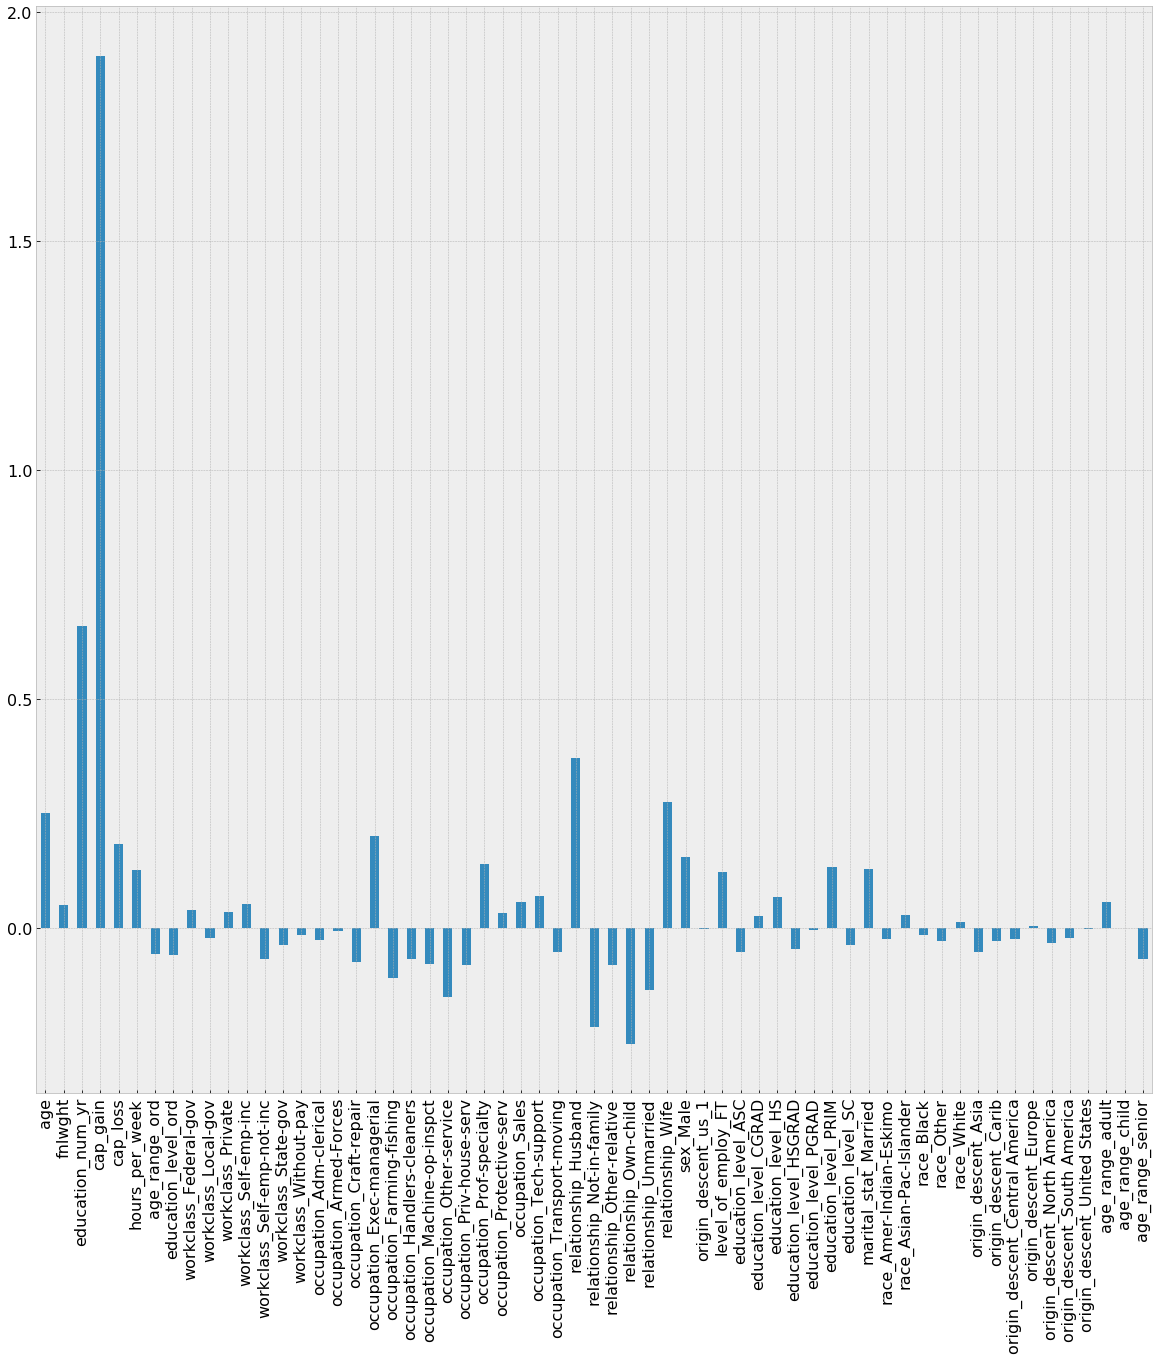

In [21]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [22]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the income_outcomw Column to the pandas support vectors dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8372 entries, 10590 to 15721
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             8372 non-null   int64
 1   fnlwght                         8372 non-null   int64
 2   education_num_yr                8372 non-null   int64
 3   cap_gain                        8372 non-null   int64
 4   cap_loss                        8372 non-null   int64
 5   hours_per_week                  8372 non-null   int64
 6   age_range_ord                   8372 non-null   int64
 7   education_level_ord             8372 non-null   int64
 8   workclass_Federal-gov           8372 non-null   int64
 9   workclass_Local-gov             8372 non-null   int64
 10  workclass_Private               8372 non-null   int64
 11  workclass_Self-emp-inc          8372 non-null   int64
 12  workclass_Self-emp-not-inc      8372 non-null   int64
 13

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

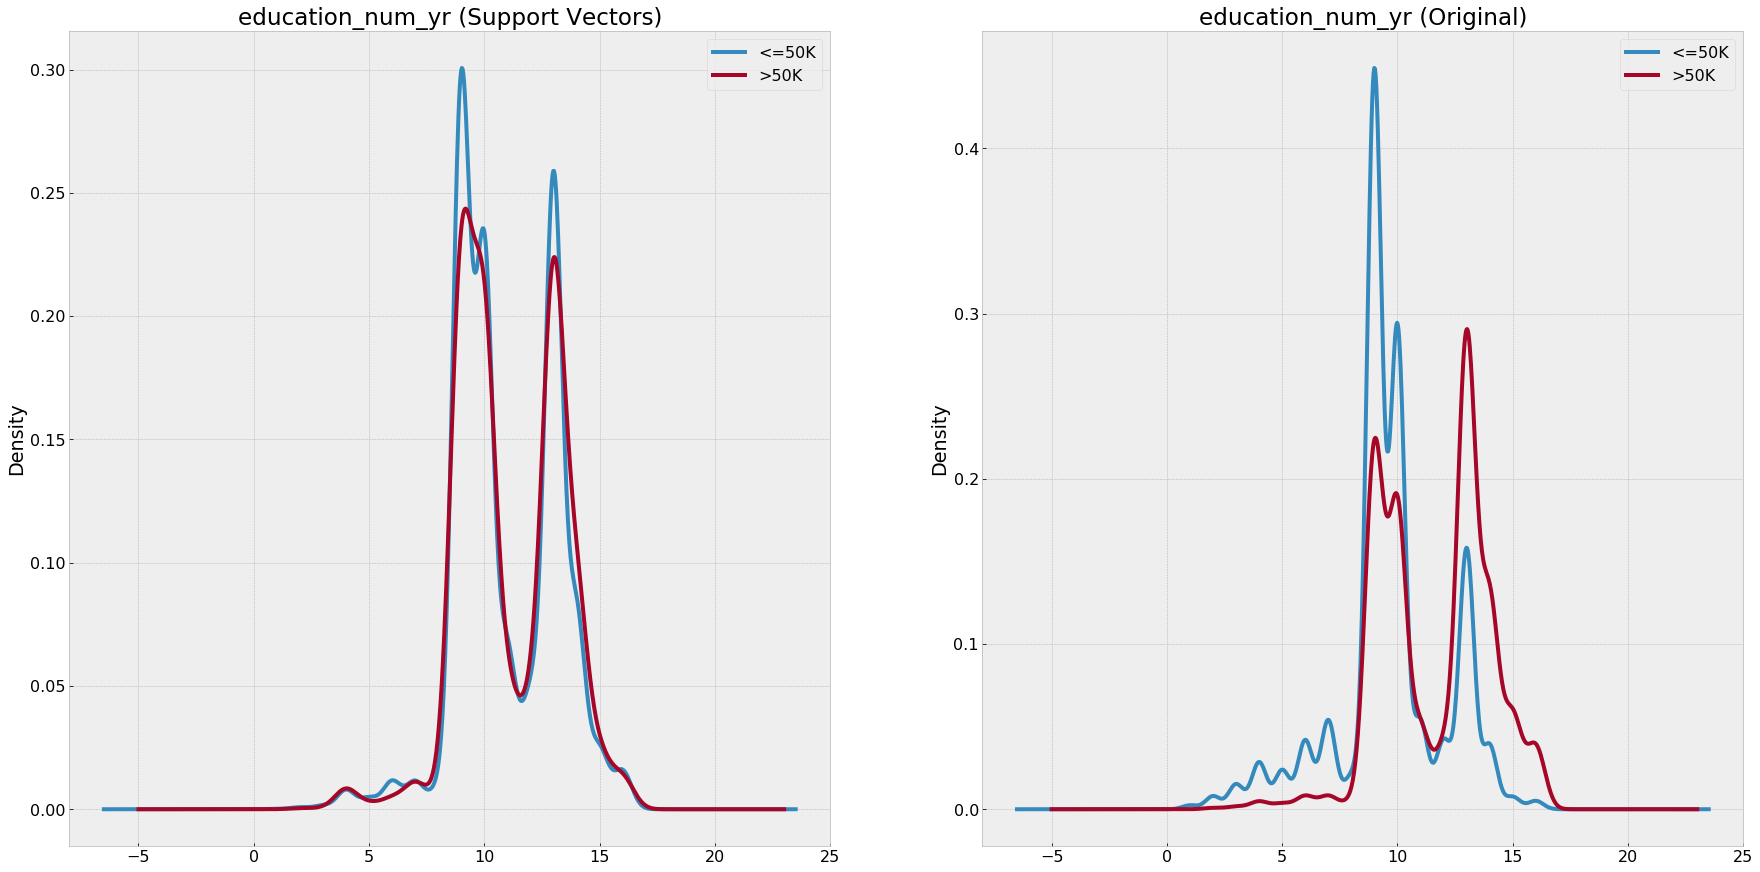

<Figure size 720x288 with 0 Axes>

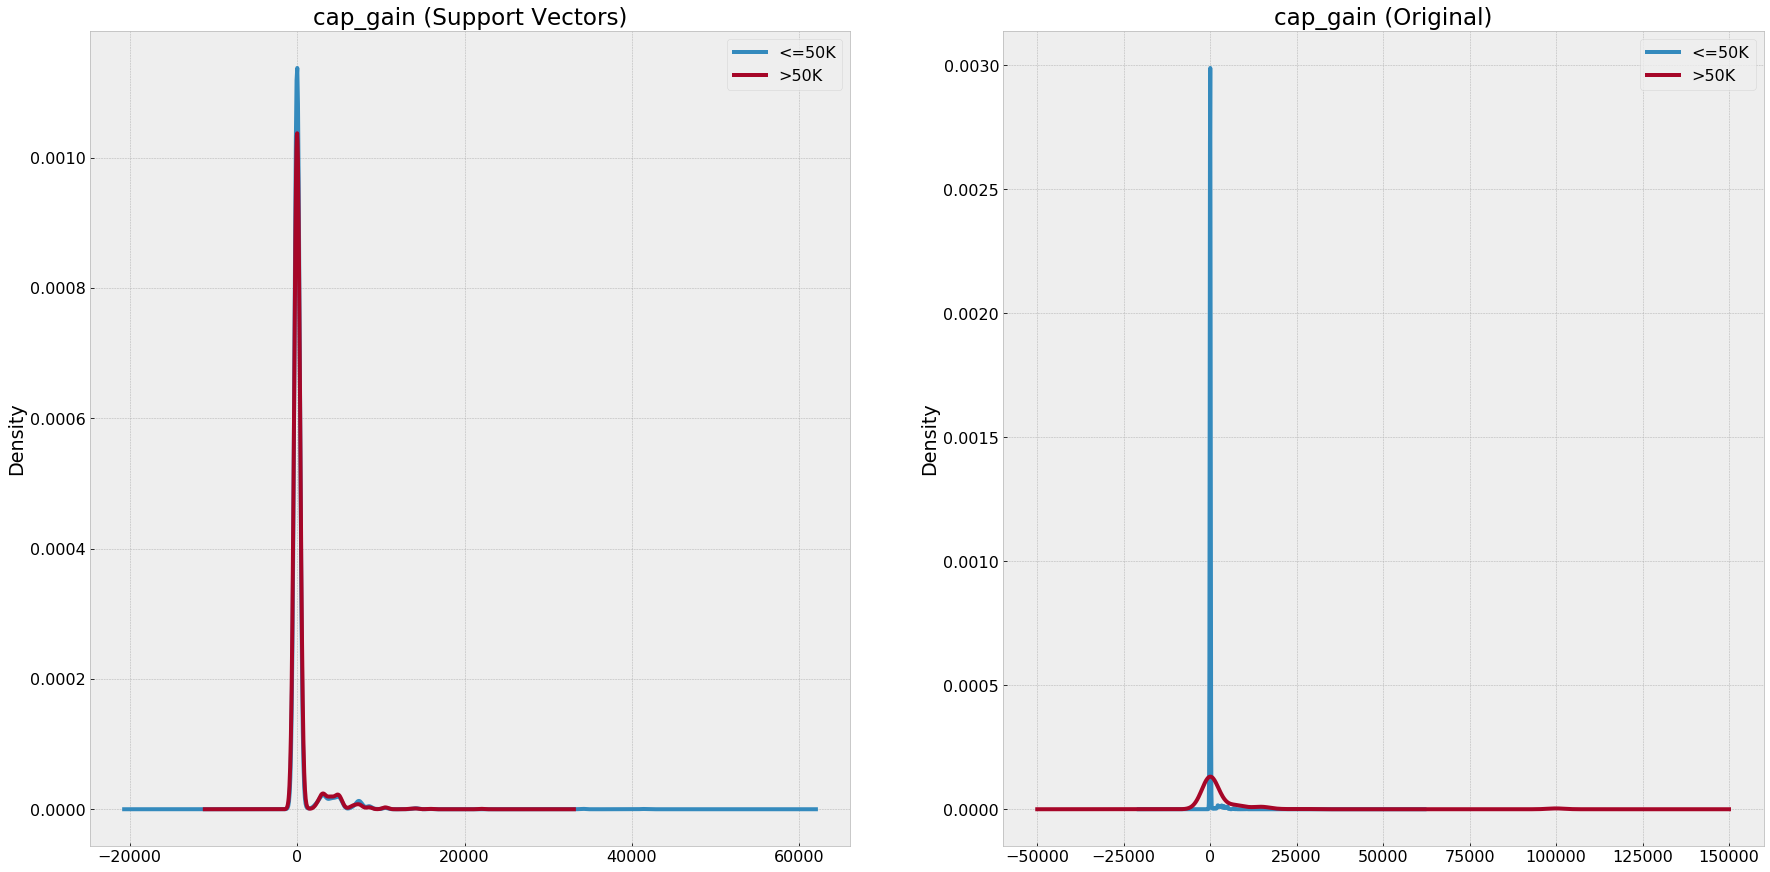

<Figure size 720x288 with 0 Axes>

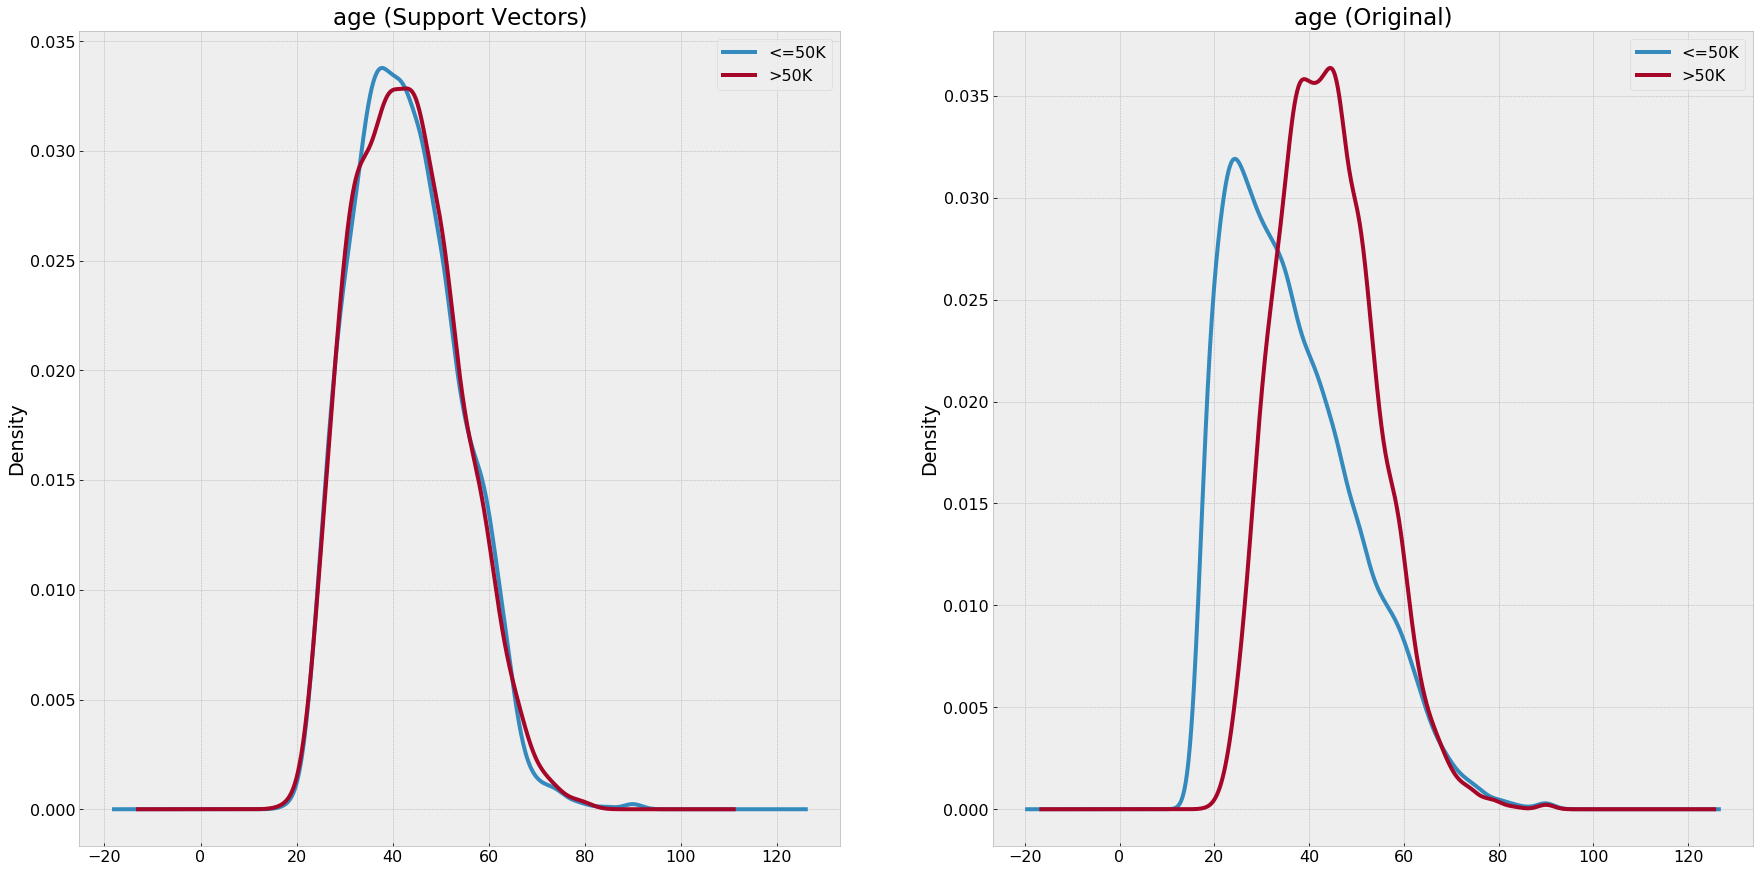

<Figure size 720x288 with 0 Axes>

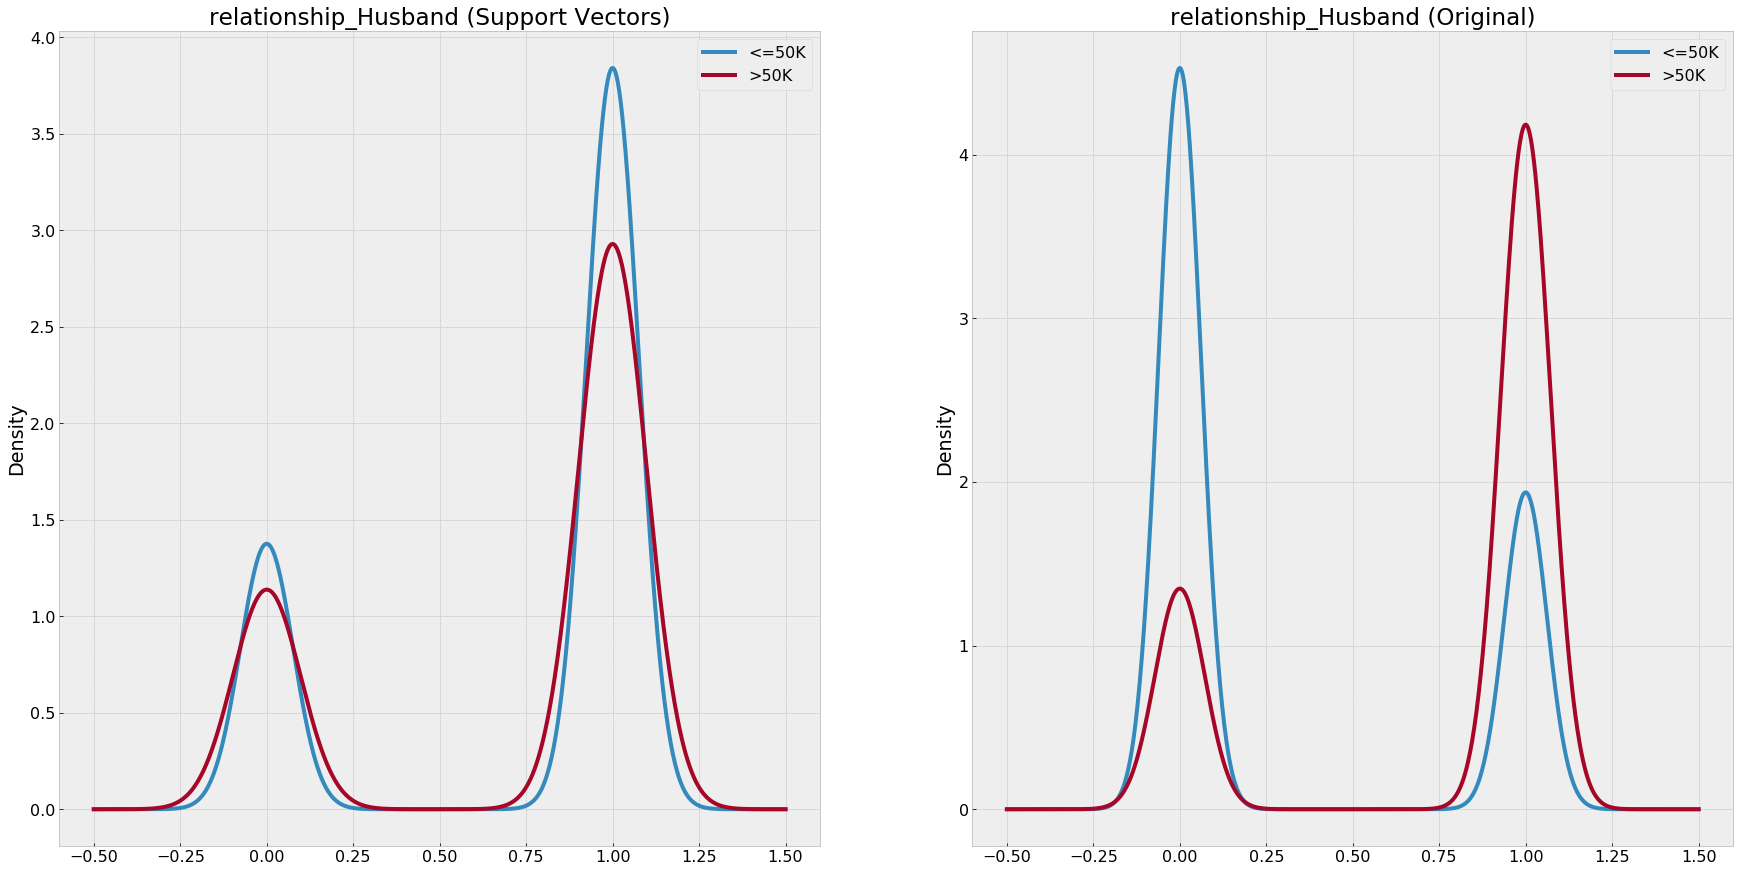

<Figure size 720x288 with 0 Axes>

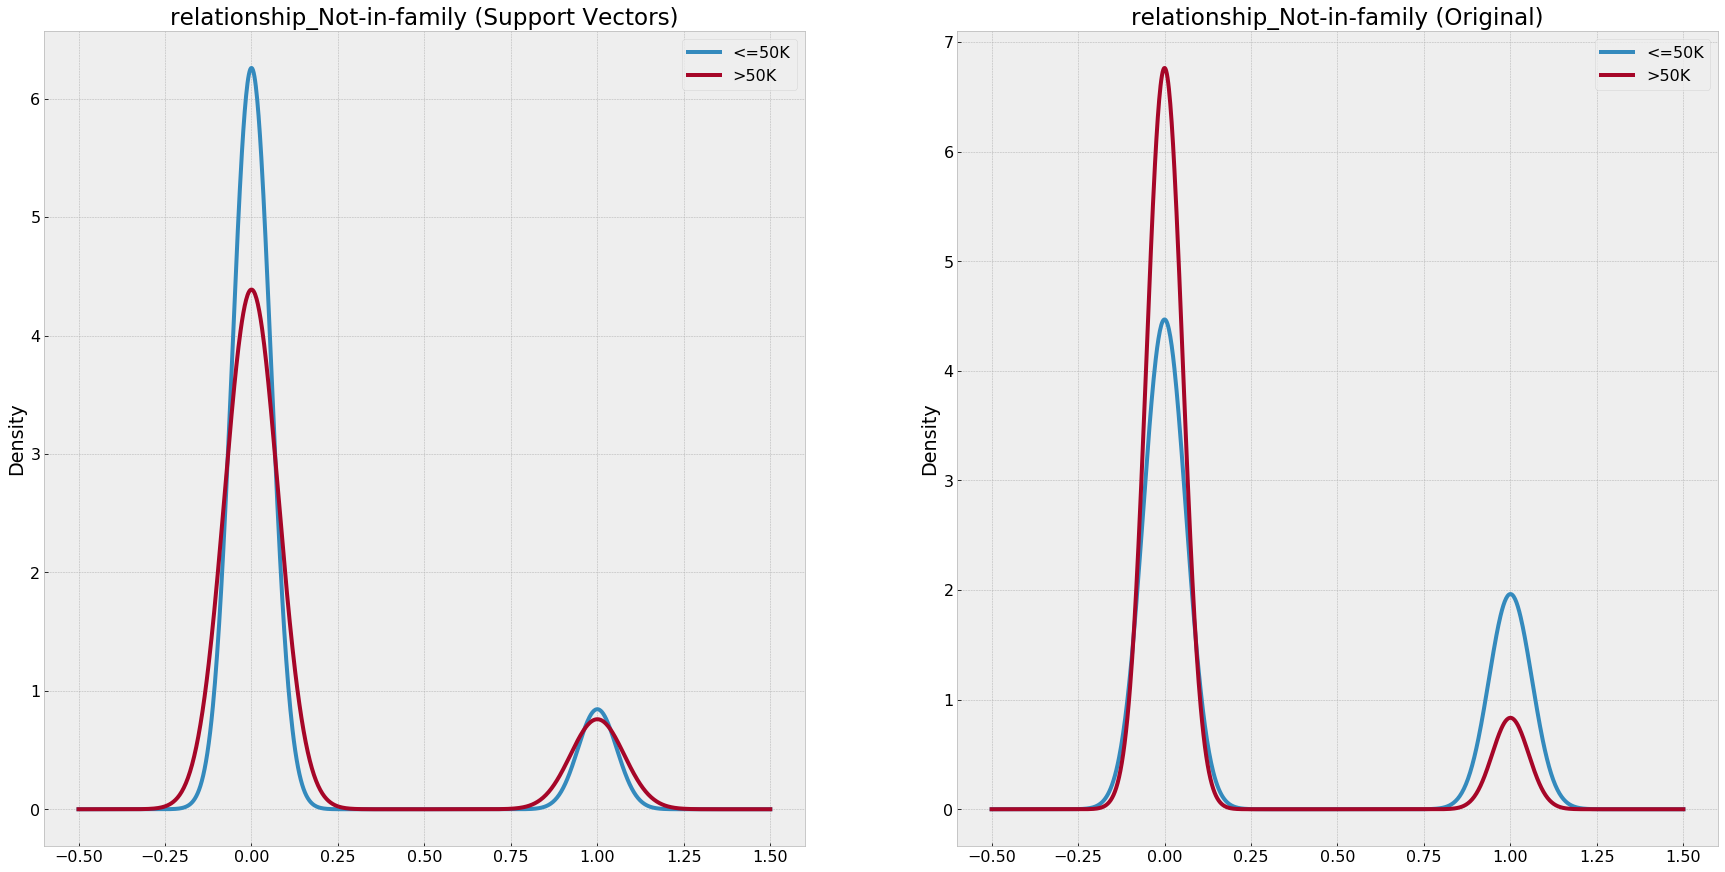

<Figure size 720x288 with 0 Axes>

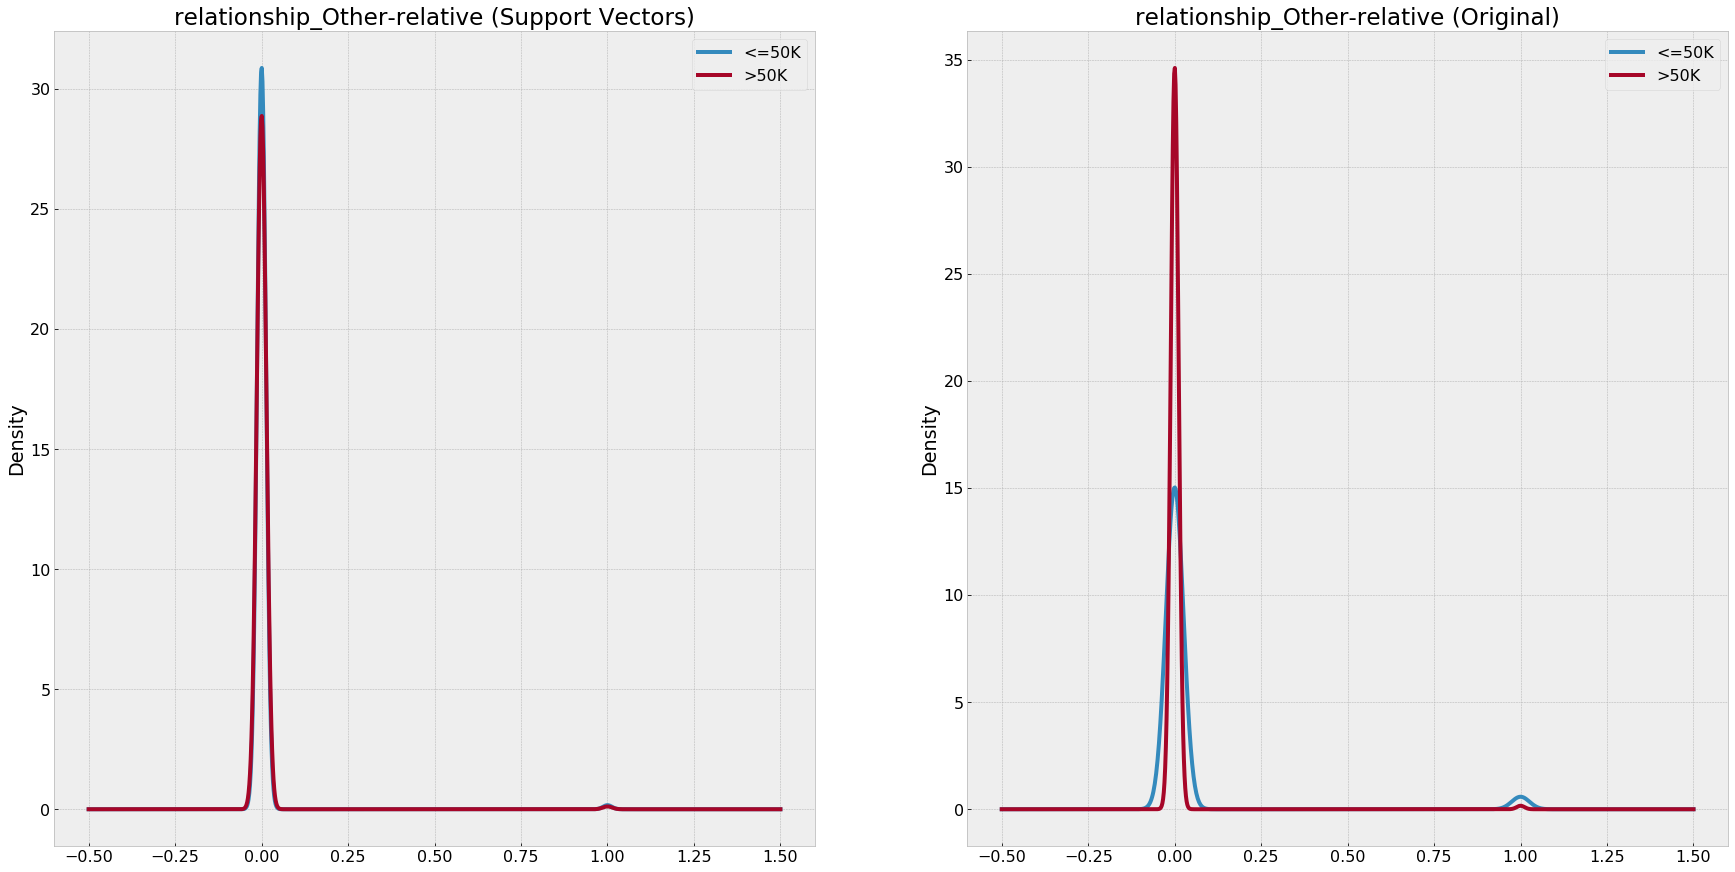

<Figure size 720x288 with 0 Axes>

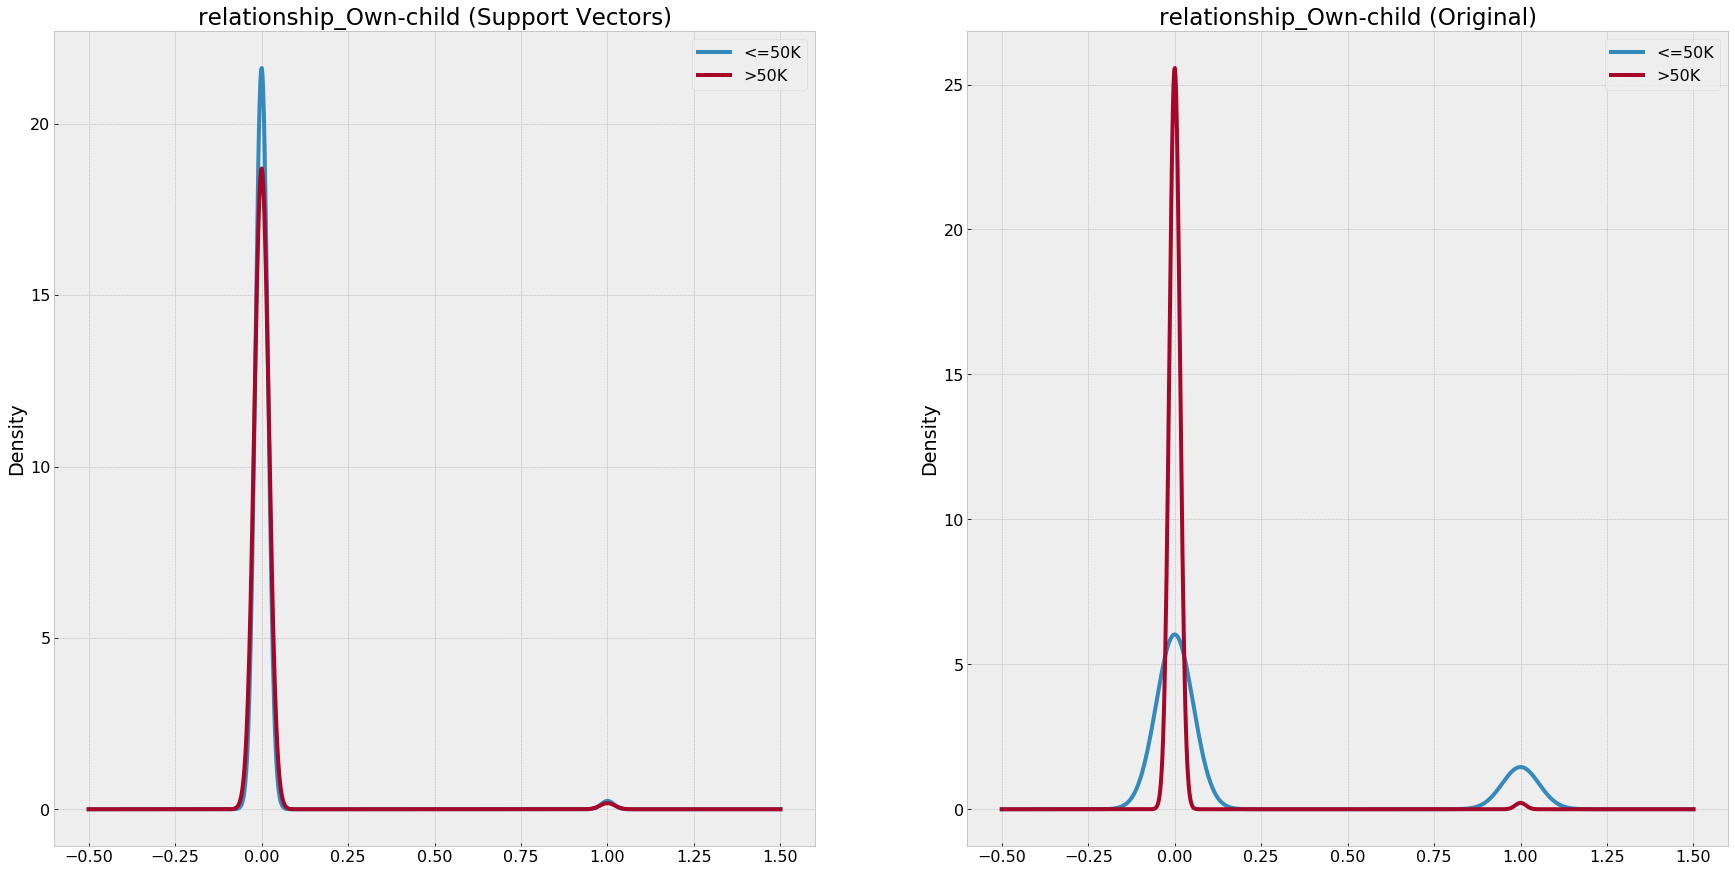

<Figure size 720x288 with 0 Axes>

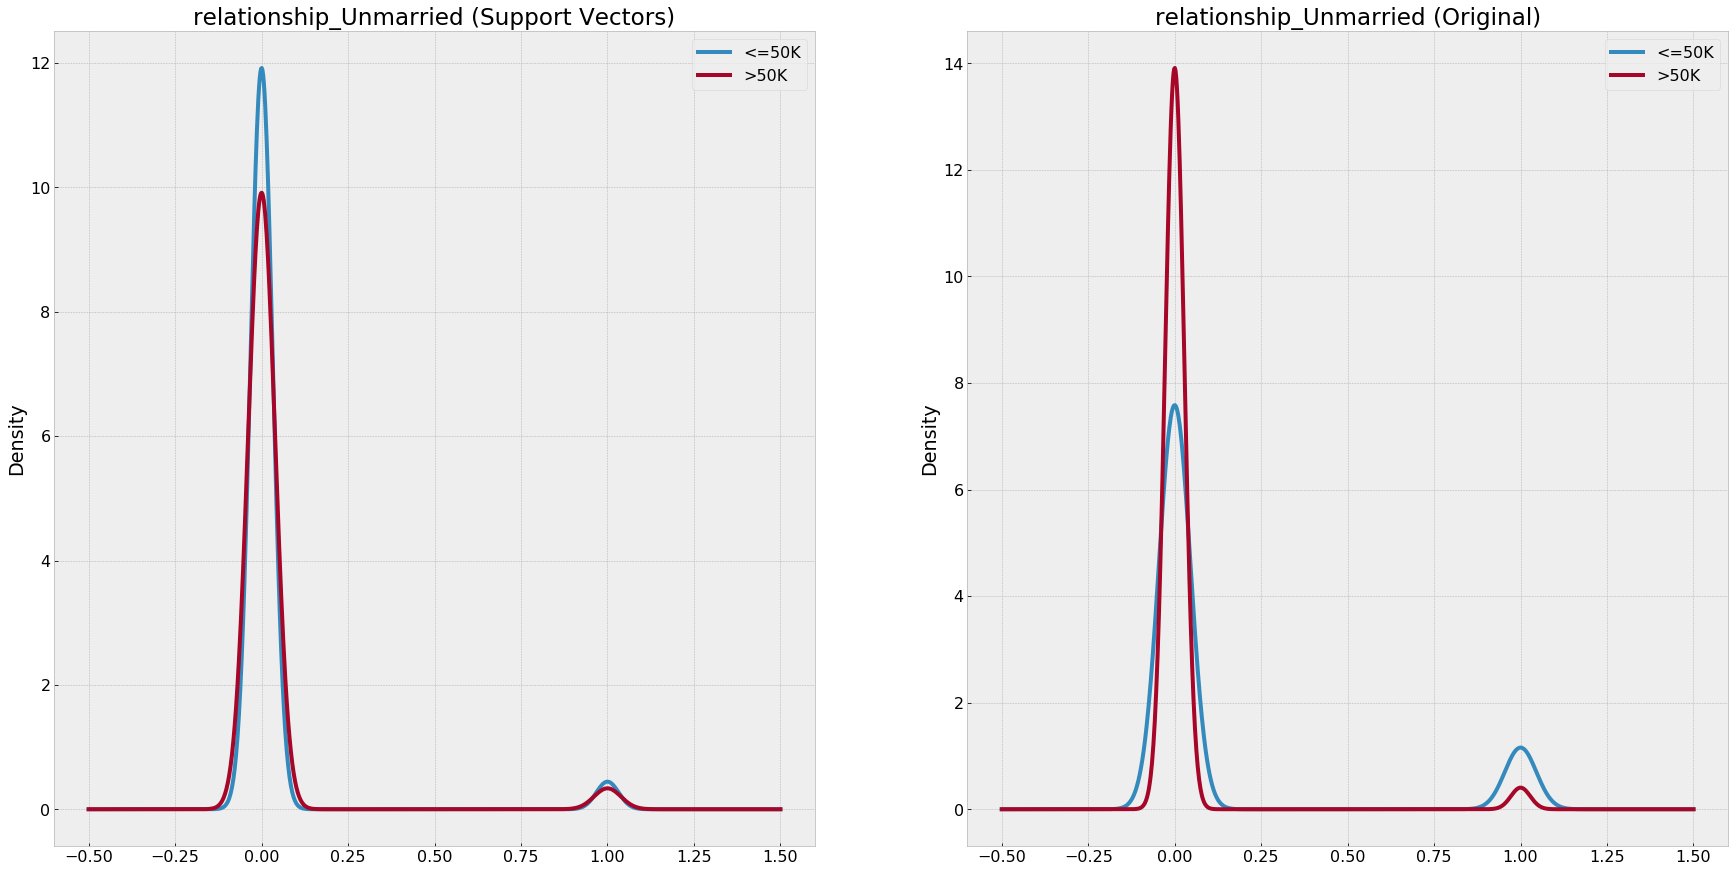

<Figure size 720x288 with 0 Axes>

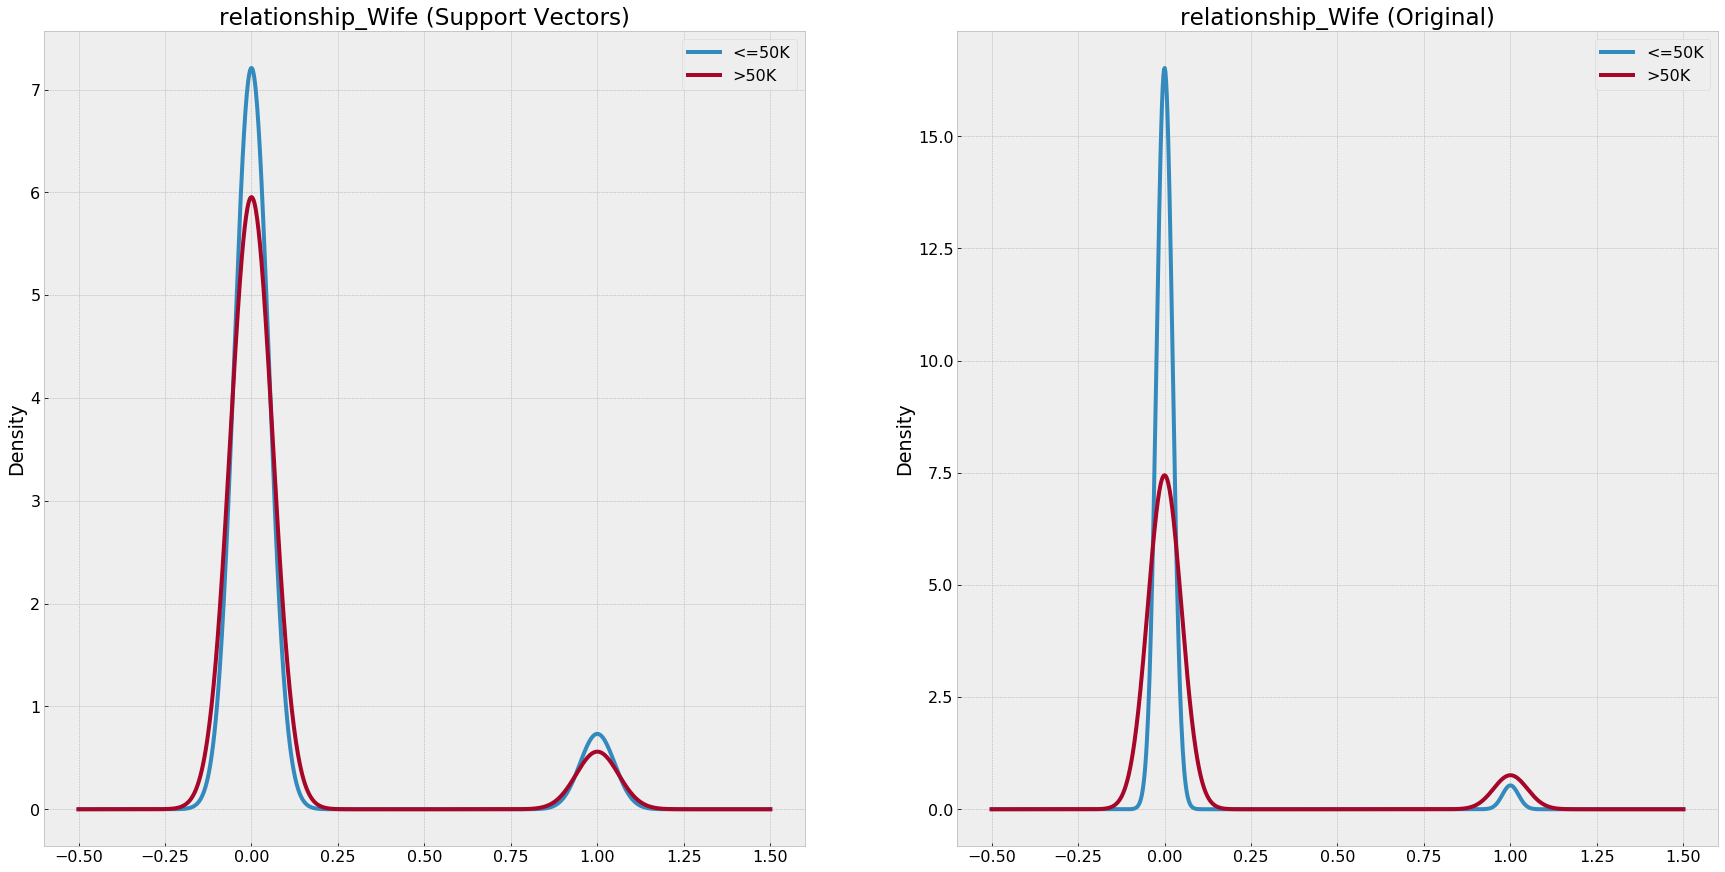

<Figure size 720x288 with 0 Axes>

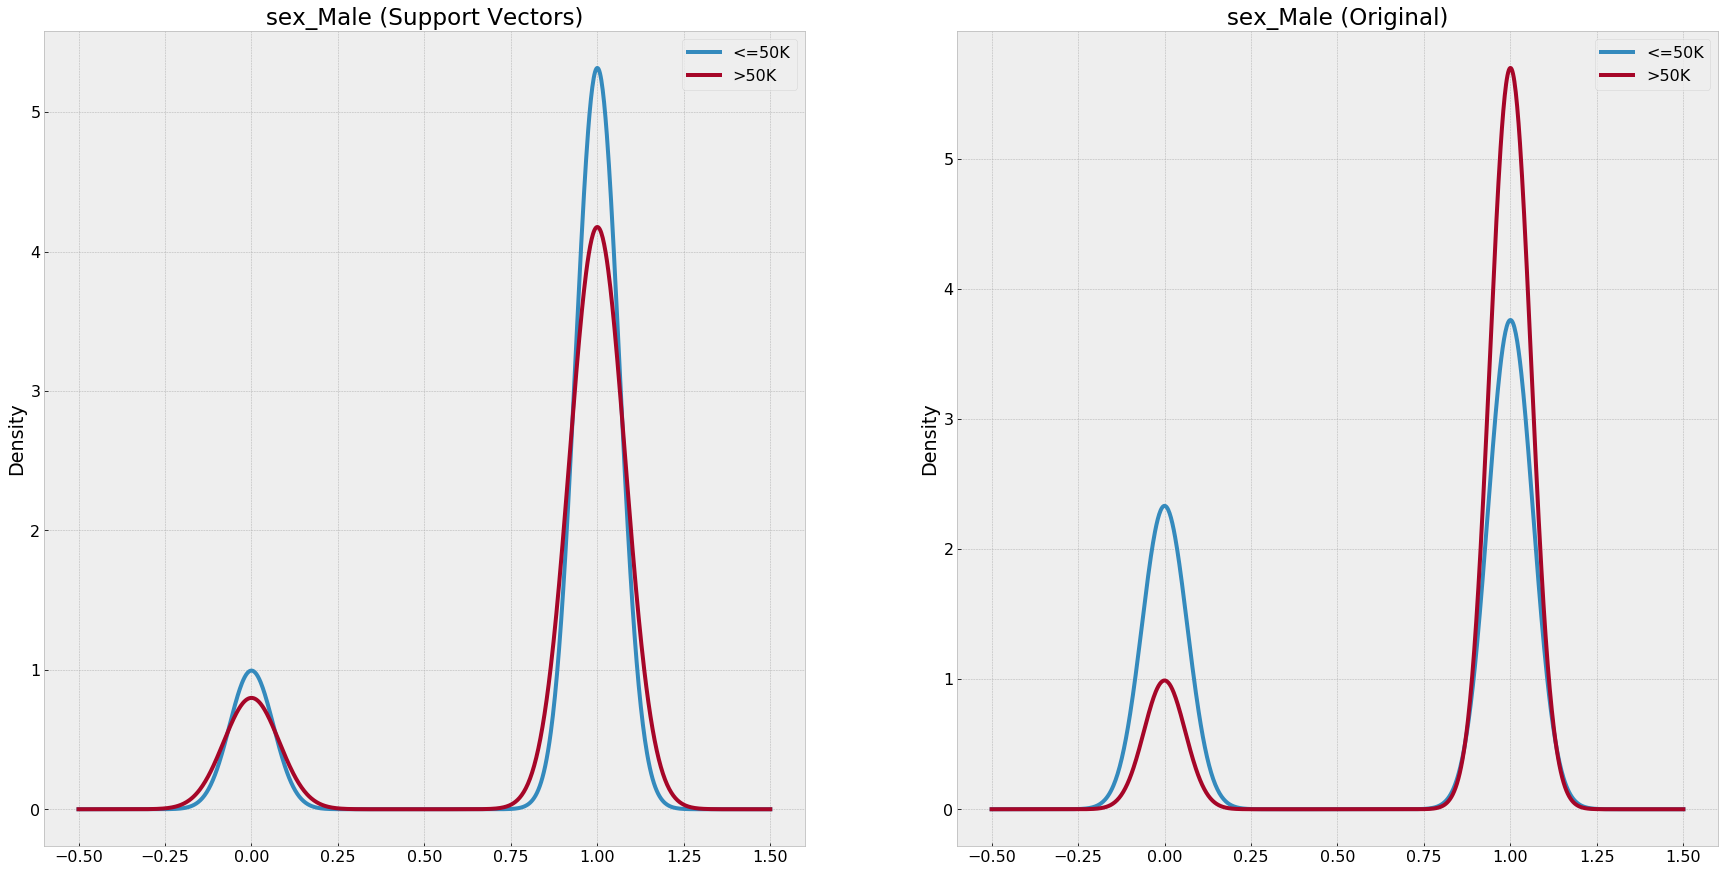

<Figure size 720x288 with 0 Axes>

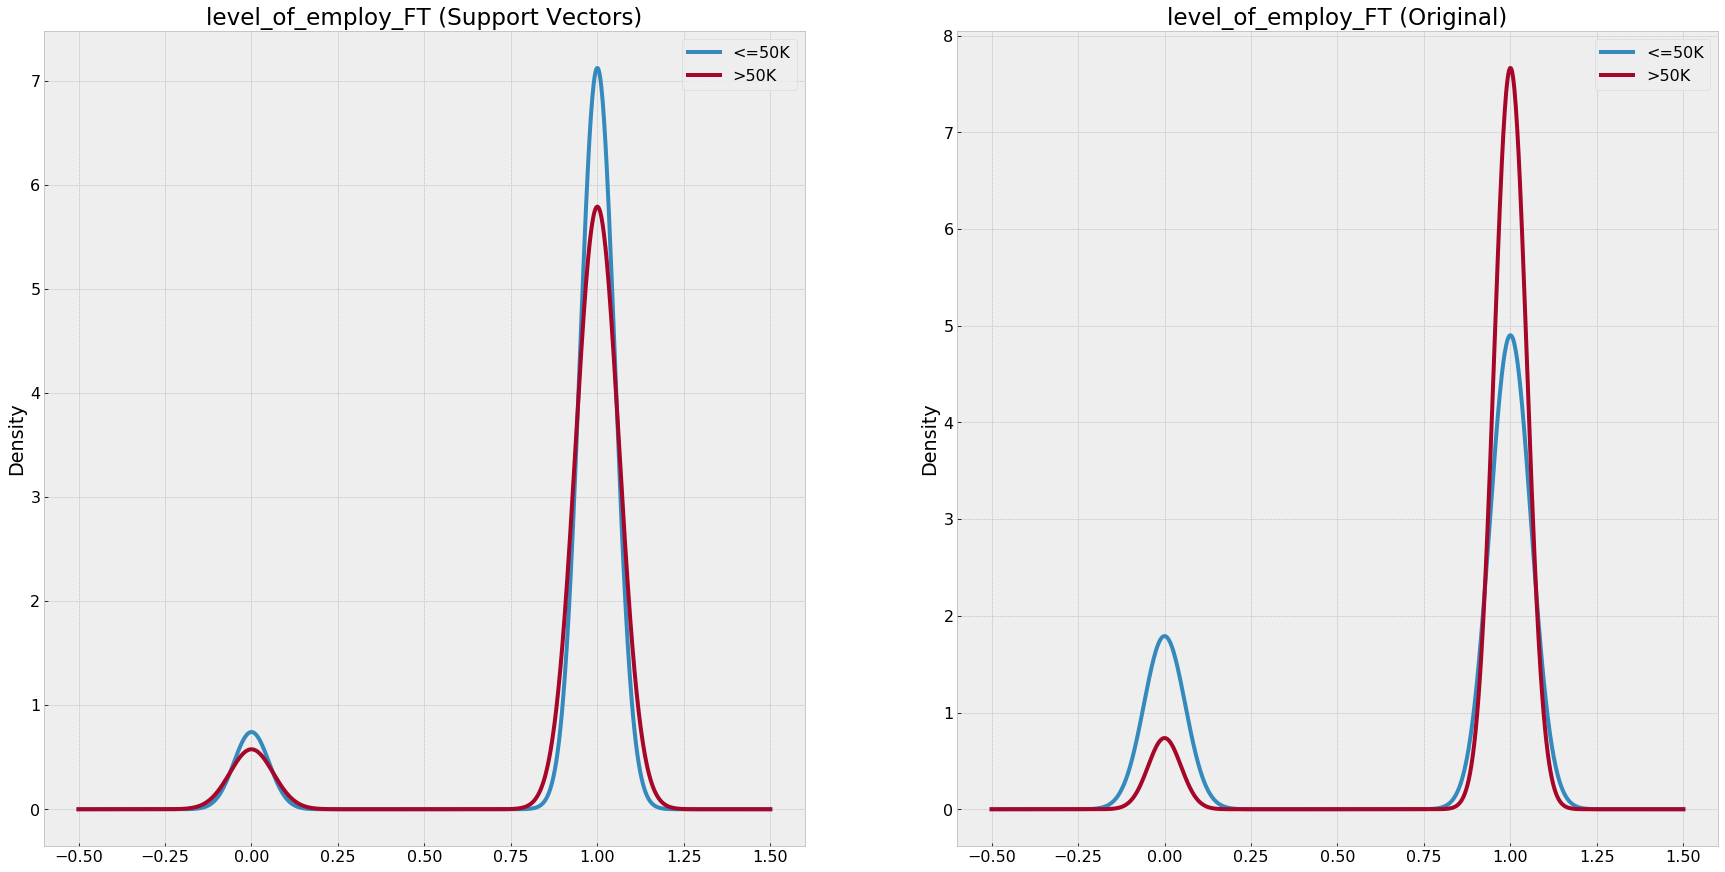

In [23]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

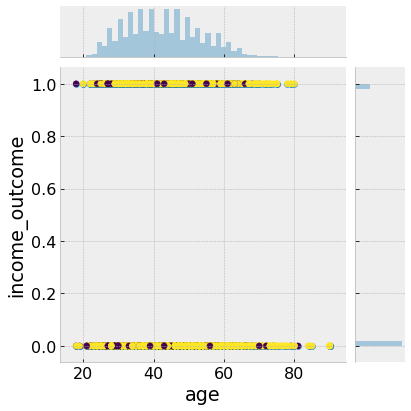

In [24]:
g = sns.jointplot('age','income_outcome',data=df_support) 
g.ax_joint.scatter(df_support.age,df_support.income_outcome, c=df_support.sex_Male)

In [25]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions


svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
#svm_clf = SVC(C=10, kernel='rbf', gamma=10) #terrible scores and long compute times

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    svm_clf.fit(X_train_scaled, y_train)  

    y_hat = svm_clf.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t

    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1
    
    

====Iteration 0  ====

Accuracy:  0.8422277639235245 

f1_score: 0.6502027276078142 

precision_score: 0.7590361445783133 

roc_auc_score: 0.7529706814195489 

Confusion Matrix: 

      0    1
0  4184  280
1   669  882 

Train Time:  37.44511127599998 s

====Iteration 1  ====

Accuracy:  0.8405652535328346 

f1_score: 0.6475560455714812 

precision_score: 0.7335553705245629 

roc_auc_score: 0.7542075259059774 

Confusion Matrix: 

      0    1
0  4175  320
1   639  881 

Train Time:  35.47862566600003 s

====Iteration 2  ====

Accuracy:  0.8510390689941812 

f1_score: 0.6519036519036518 

precision_score: 0.7477718360071302 

roc_auc_score: 0.7579015454889579 

Confusion Matrix: 

      0    1
0  4280  283
1   613  839 

Train Time:  36.75663592199999 s



In [26]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

    t = time.process_time()
    
    svm_sgd.fit(X_train_scaled,y_train)
    yhat = svm_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.8350789692435577 

f1_score: 0.5996771589991928 

precision_score: 0.7581632653061224 

roc_auc_score: 0.7217631035166658 

Confusion Matrix: 

      0    1
0  4280  237
1   755  743 

Train Time:  0.05065204199996742 s

====Iteration 1  ====

Accuracy:  0.8408977556109726 

f1_score: 0.625440313111546 

precision_score: 0.7474275023386342 

roc_auc_score: 0.7390346256679327 

Confusion Matrix: 

      0    1
0  4259  270
1   687  799 

Train Time:  0.16560856700004933 s

====Iteration 2  ====

Accuracy:  0.8430590191188695 

f1_score: 0.6233040702314444 

precision_score: 0.782565130260521 

roc_auc_score: 0.7348785914513174 

Confusion Matrix: 

      0    1
0  4290  217
1   727  781 

Train Time:  0.1658789979999824 s



In [27]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    log_sgd.fit(X_train_scaled,y_train)
    yhat = log_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.8332502078137989 

f1_score: 0.5887658876588766 

precision_score: 0.7720430107526882 

roc_auc_score: 0.7143817079767292 

Confusion Matrix: 

      0    1
0  4294  212
1   791  718 

Train Time:  0.06915268899996363 s

====Iteration 1  ====

Accuracy:  0.8344139650872818 

f1_score: 0.5870646766169153 

precision_score: 0.7654054054054054 

roc_auc_score: 0.7141012003916154 

Confusion Matrix: 

      0    1
0  4311  217
1   779  708 

Train Time:  0.24308206700004575 s

====Iteration 2  ====

Accuracy:  0.8370739817123857 

f1_score: 0.5996732026143791 

precision_score: 0.7800212539851222 

roc_auc_score: 0.7205710087618326 

Confusion Matrix: 

      0    1
0  4301  207
1   773  734 

Train Time:  0.24021151699997745 s



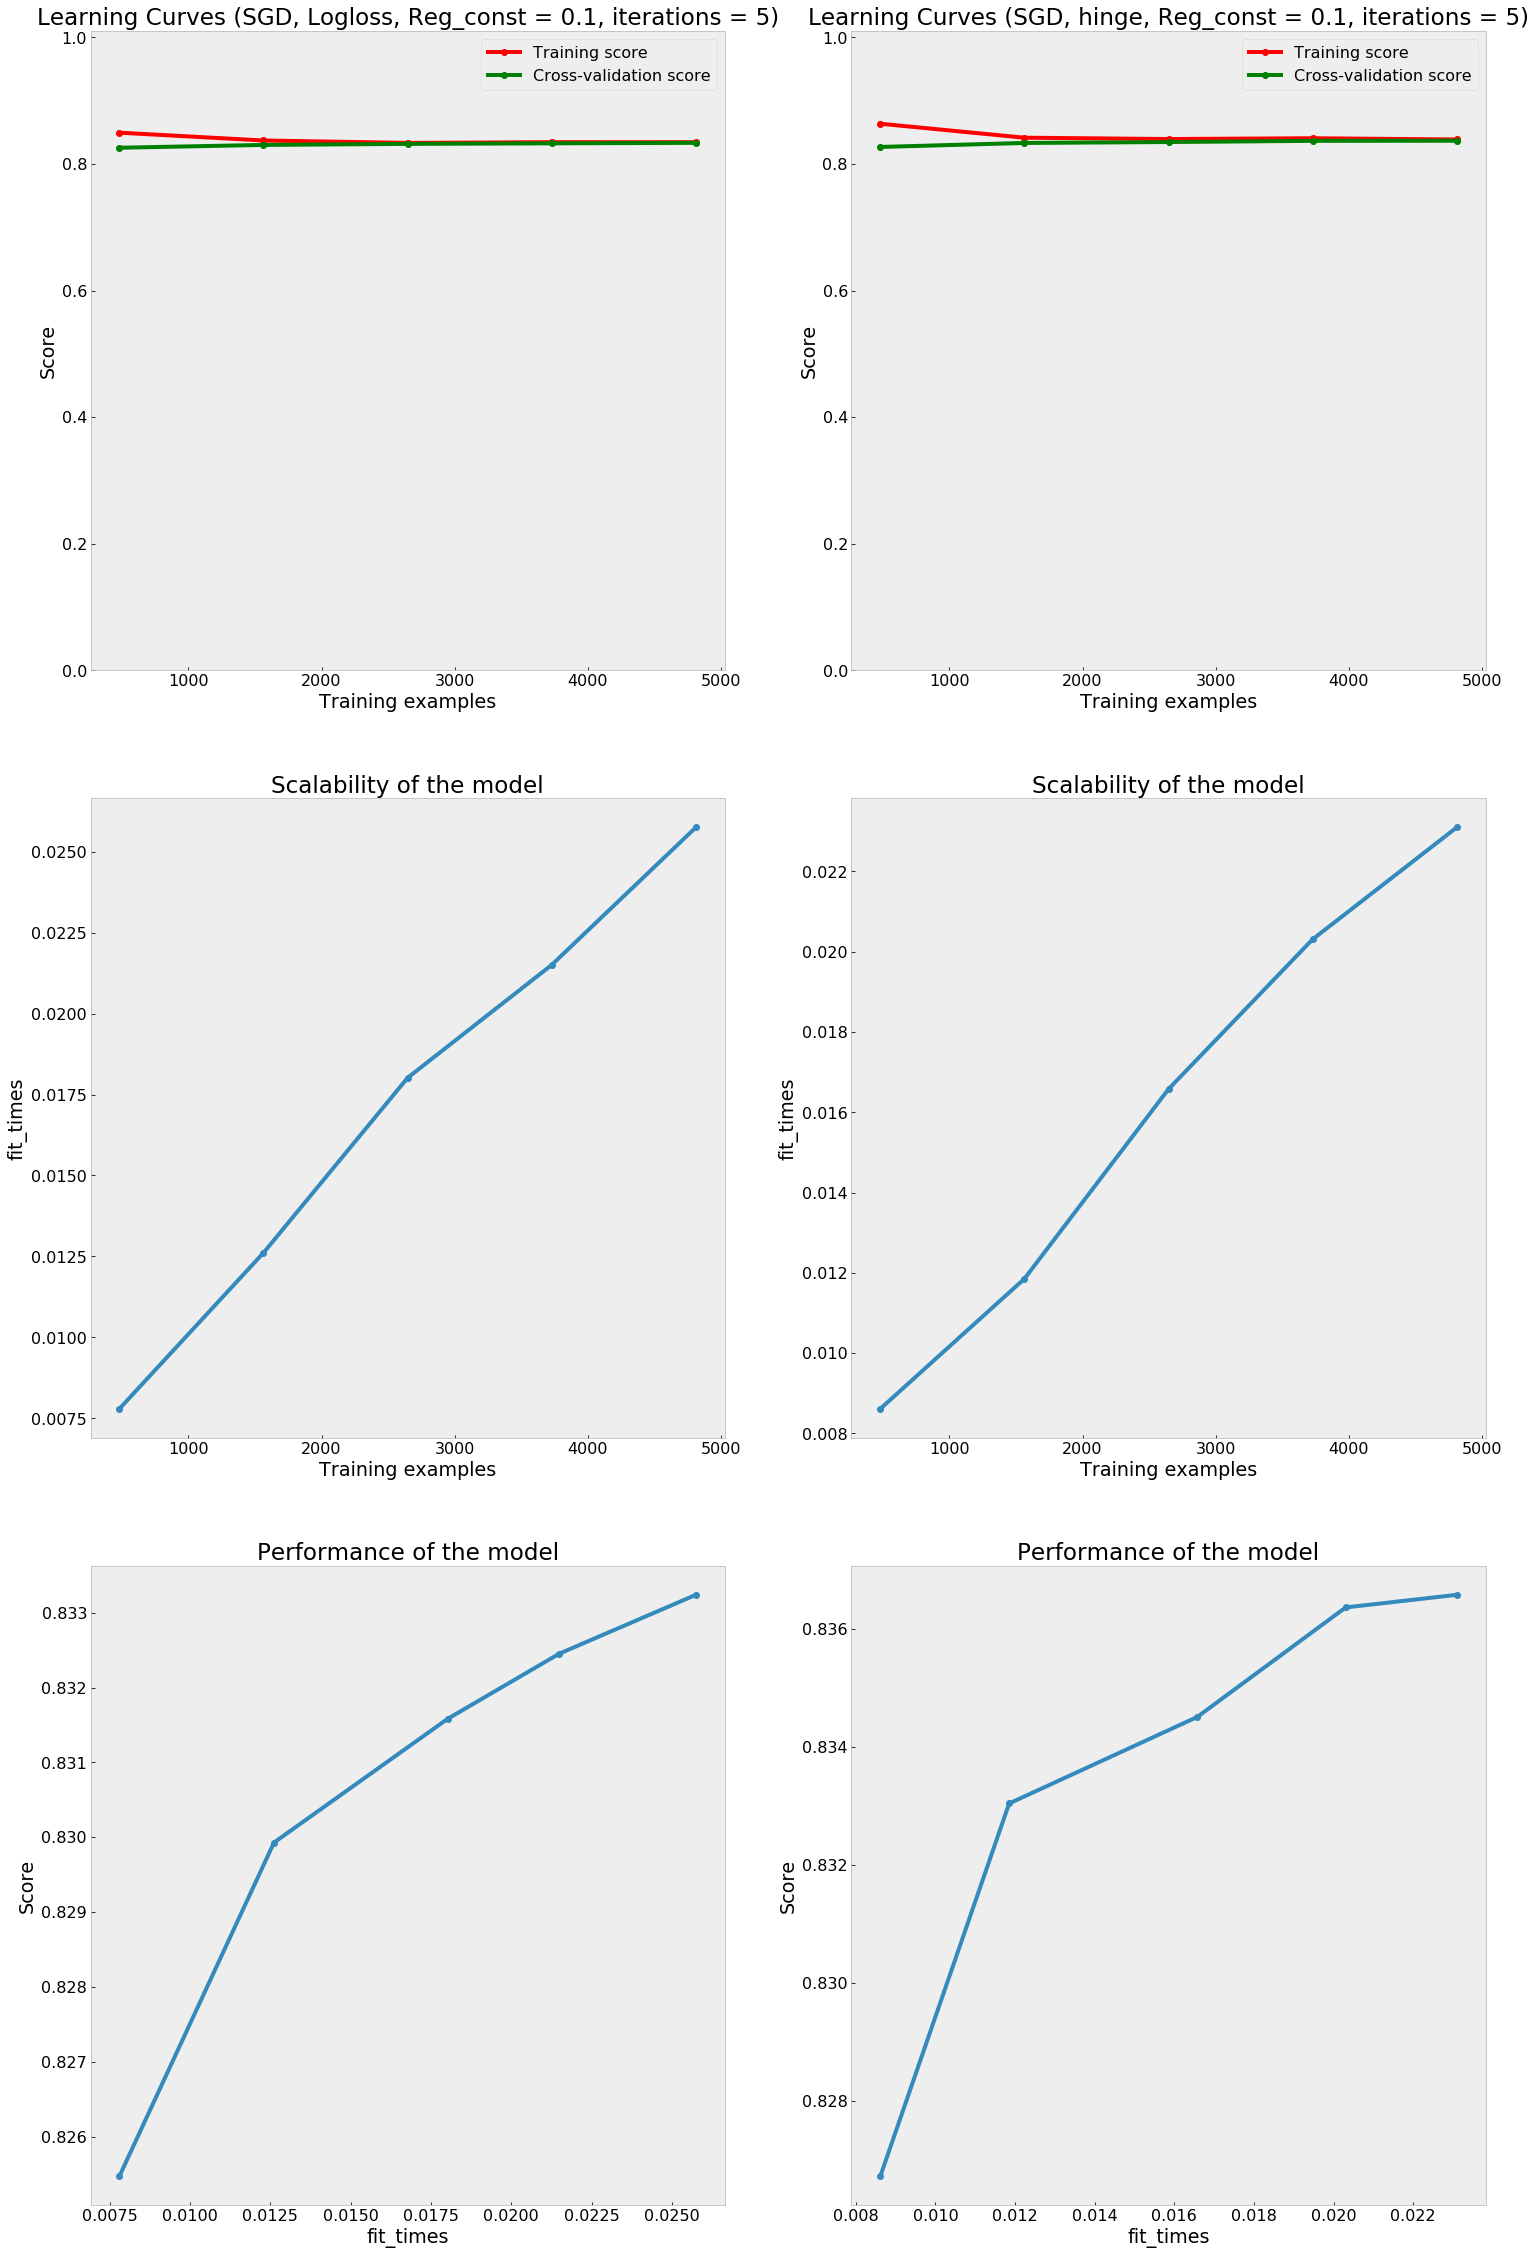

In [28]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()

    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (SGD, Logloss, Reg_const = 0.1, iterations = 5)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (SGD, hinge, Reg_const = 0.1, iterations = 5)"

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

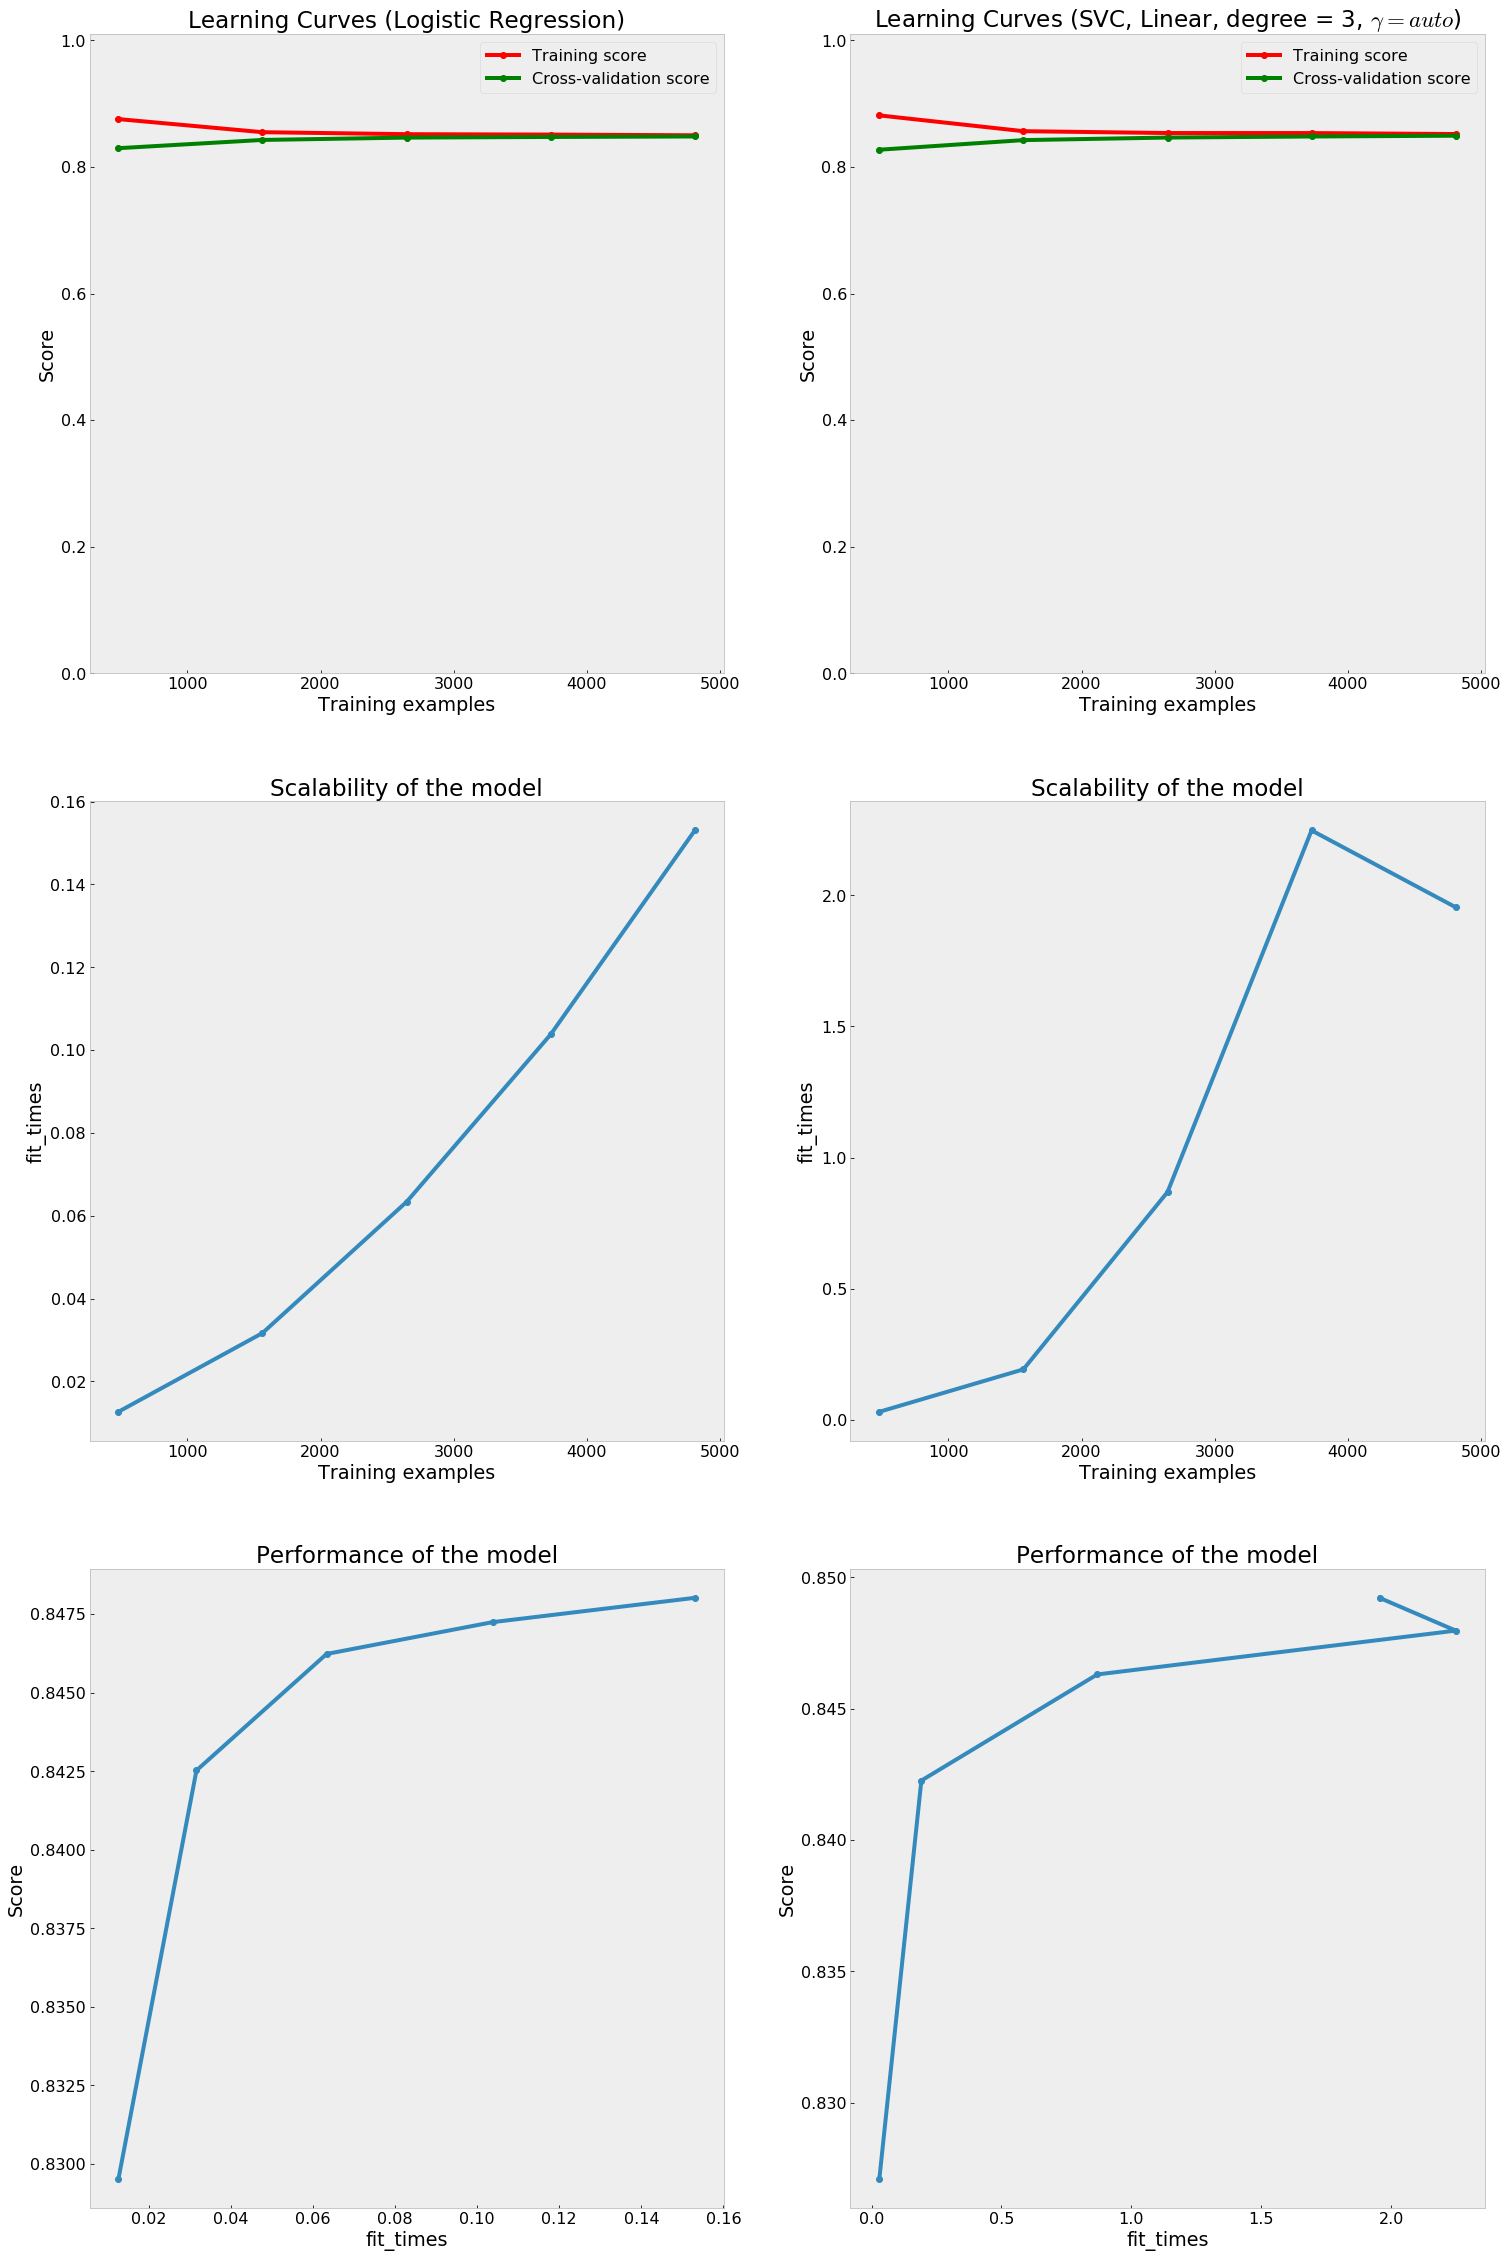

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (SVC, Linear, degree = 3, $\gamma=auto$)"

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

Rubric Sections

https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome
Create Models: 

50 PTS 

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

Model Advantages: 

10 PTS 

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Interpret Feature Importance: 

30 PTS 

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

Interpret Support Vectors: 

10 PTS 

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.